here we use classification models in a algoritham
-->GradientBoostingClassifier


In [5]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("/content/dataset.csv")
df

,Latitude,Longitude,Depth,Magnitude
0,29.06,77.42,5.0,2.5
1,19.93,72.92,5.0,2.4
2,31.50,74.37,33.0,3.4
3,28.34,76.23,5.0,3.1
4,27.09,89.97,10.0,2.1
...,...,...,...,...
2714,12.30,94.80,10.0,4.8
2715,24.70,94.30,40.0,4.1
2716,22.50,88.10,10.0,3.6
2717,24.60,94.20,54.0,3.5


In [7]:
def magnitude_to_label(magnitude):
    if magnitude < 3.0:
        return 'Low'
    elif 3.0 <= magnitude < 6.0:
        return 'Moderate'
    else:
        return 'High'

df['Magnitude_Label'] = df['Magnitude'].apply(magnitude_to_label)

X = df.drop(['Magnitude', 'Magnitude_Label'], axis=1)
y = df['Magnitude_Label']


In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
print("X_train:\n",X_train)
print("X_test:\n",X_test)

X_train:
       Latitude  Longitude  Depth
1635     32.62      71.34  291.0
2631     35.20      77.80   10.0
1001     25.49      66.58   10.0
2414     39.11      73.24  350.0
201      17.36      73.84    5.0
...        ...        ...    ...
2453     37.70      75.80  158.0
1723     11.70      92.40   10.0
1698     37.60      71.30  255.0
909      36.40      68.93   10.0
2671     25.90      90.80    5.0

[2175 rows x 3 columns]
X_test:
       Latitude  Longitude  Depth
1840      1.40      99.60   43.0
74       37.40      73.03   10.0
1104     19.93      72.82    5.0
1347     28.12      66.49   30.0
995      23.54      95.08   18.0
...        ...        ...    ...
1070     37.55      72.71  105.0
667      39.27      74.29   10.0
1293     36.39      71.36  190.0
1512     36.39      69.43   10.0
1896     22.60      93.70   64.0

[544 rows x 3 columns]


In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
print("X_train_scaled:\n",X_train_scaled)
print("X_test_scaled:\n",X_test_scaled)

X_train_scaled:
 [[ 0.3632086  -0.94684183  3.44887715]
 [ 0.71336515 -0.30935283 -0.63785522]
 [-0.60447211 -1.41657056 -0.63785522]
 ...
 [ 1.03909218 -0.95078913  2.92531002]
 [ 0.87622867 -1.18466667 -0.63785522]
 [-0.54882708  0.97351977 -0.71057288]]
X_test_scaled:
 [[-3.87395716  1.84192584 -0.15791868]
 [ 1.01194826 -0.78006839 -0.63785522]
 [-1.35907306 -0.80079172 -0.71057288]
 ...
 [ 0.87487147 -0.94486818  1.97998046]
 [ 0.87487147 -1.13532542 -0.63785522]
 [-0.99670174  1.25969904  0.14749548]]


In [12]:
model = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(max_depth=5, random_state=42)

In [13]:
y_pred = model.predict(X_test_scaled)
print("y_pred:\n",y_pred)

y_pred:
 ['Moderate' 'Moderate' 'Low' 'Moderate' 'Moderate' 'Moderate' 'Low'
 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Low' 'Moderate' 'Moderate'
 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate'
 'Moderate' 'Moderate' 'Moderate' 'Low' 'Moderate' 'Moderate' 'Moderate'
 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Low' 'Moderate'
 'Low' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate'
 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate'
 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Low' 'Moderate' 'Moderate'
 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Low' 'Moderate' 'Moderate'
 'Moderate' 'Moderate' 'Moderate' 'Low' 'Moderate' 'Moderate' 'Moderate'
 'Moderate' 'Low' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate'
 'Low' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Low' 'Low'
 'Low' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate'
 'Moderate' 'Moderate' 'Moderate' 'Low' 'High' 'Moderate' 

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f" High Accuracy: {accuracy:.4f}")

 High Accuracy: 0.8382


In [15]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Low", "Moderate", "High"]))


Classification Report:
               precision    recall  f1-score   support

         Low       0.00      0.00      0.00         2
    Moderate       0.57      0.52      0.54        96
        High       0.90      0.91      0.90       446

    accuracy                           0.84       544
   macro avg       0.49      0.48      0.48       544
weighted avg       0.84      0.84      0.84       544



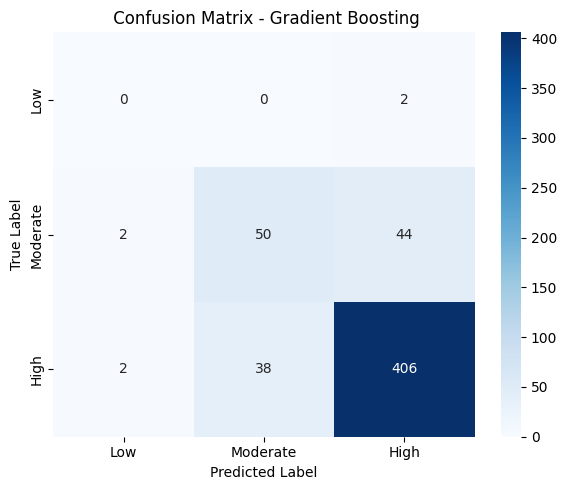

In [16]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Low", "Moderate", "High"],
            yticklabels=["Low", "Moderate", "High"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(" Confusion Matrix - Gradient Boosting")
plt.tight_layout()
plt.show()

another classification model
-->Logistic regression

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [18]:
df=pd.read_csv('/content/dataset.csv')
df

,Latitude,Longitude,Depth,Magnitude
0,29.06,77.42,5.0,2.5
1,19.93,72.92,5.0,2.4
2,31.50,74.37,33.0,3.4
3,28.34,76.23,5.0,3.1
4,27.09,89.97,10.0,2.1
...,...,...,...,...
2714,12.30,94.80,10.0,4.8
2715,24.70,94.30,40.0,4.1
2716,22.50,88.10,10.0,3.6
2717,24.60,94.20,54.0,3.5


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2719 entries, 0 to 2718
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   2719 non-null   float64
 1   Longitude  2719 non-null   float64
 2   Depth      2719 non-null   float64
 3   Magnitude  2719 non-null   float64
dtypes: float64(4)
memory usage: 85.1 KB


In [20]:
df.head(15)

,Latitude,Longitude,Depth,Magnitude
0,29.06,77.42,5.0,2.5
1,19.93,72.92,5.0,2.4
2,31.50,74.37,33.0,3.4
3,28.34,76.23,5.0,3.1
4,27.09,89.97,10.0,2.1
5,38.52,73.27,115.0,5.2
6,27.90,94.20,10.0,3.0
7,26.60,92.51,28.0,3.1
8,22.88,95.95,10.0,5.5
9,37.96,72.39,160.0,4.3


In [21]:
df.describe()

,Latitude,Longitude,Depth,Magnitude
count,2719.000000,2719.000000,2719.000000,2719.000000
mean,29.939433,80.905638,53.400478,3.772196
std,7.361564,10.139075,68.239737,0.768076
min,0.120000,60.300000,0.800000,1.500000
25%,25.700000,71.810000,10.000000,3.200000
50%,31.210000,76.610000,15.000000,3.900000
75%,36.390000,92.515000,82.000000,4.300000
max,40.000000,99.960000,471.000000,7.000000


In [22]:
df.shape

(2719, 4)

In [23]:
df.isnull().sum()

,0
Latitude,0
Longitude,0
Depth,0
Magnitude,0


In [24]:

def magnitude_to_label(mag):
    if mag < 3.0:
        return 0   # Low
    elif 3.0 <= mag <= 5.0:
        return 1   # Moderate
    else:
        return 2   # High

df['Magnitude_Label'] = df['Magnitude'].apply(magnitude_to_label)

In [25]:
x = df.drop(['Magnitude','Magnitude_Label'], axis=1)
y = df['Magnitude_Label']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
print("x_train:\n",x_train)
print("x_test:\n",x_test)

x_train:
       Latitude  Longitude  Depth
2381     26.30      90.00   15.0
695      26.85      93.31   30.0
1407     28.25      88.06  147.0
445      32.63      76.32   14.0
998      38.94      70.85   10.0
...        ...        ...    ...
1638      6.56      92.81   10.0
1095     19.57      73.14    5.0
1130     29.74      95.78   10.0
1294     23.79      88.36   10.0
860      28.96      76.99   14.0

[2175 rows x 3 columns]
x_test:
       Latitude  Longitude  Depth
655      23.70      93.10   30.0
407      34.19      76.63    5.0
2369     28.40      95.30   10.0
693      39.53      72.43   10.0
1769     36.70      71.30  248.0
...        ...        ...    ...
347      26.73      92.38   15.0
1904     36.30      70.70  144.0
907      38.12      74.44   10.0
2063     28.60      77.00    6.0
2355     39.29      77.39  105.0

[544 rows x 3 columns]


In [28]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [29]:
print("x_train_scaled:\n",x_train_scaled)


x_train_scaled:
 [[-0.4954332   0.90083728 -0.55403162]
 [-0.42043471  1.22868254 -0.33536588]
 [-0.22952947  0.70868627  1.37022687]
 ...
 [-0.02635176  1.4733284  -0.6269202 ]
 [-0.83769902  0.73840035 -0.6269202 ]
 [-0.13271325 -0.387763   -0.56860933]]


In [30]:
print("x_test_scaled:\n",x_test_scaled)

x_test_scaled:
 [[-0.8499715   1.20788269 -0.33536588]
 [ 0.58045418 -0.42341989 -0.69980878]
 [-0.20907534  1.42578589 -0.6269202 ]
 ...
 [ 1.11635245 -0.64033261 -0.6269202 ]
 [-0.18180316 -0.38677253 -0.68523106]
 [ 1.27589469 -0.34814423  0.7579628 ]]


In [31]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [32]:
y_pred = model.predict(x_test_scaled)

In [33]:
print("y_pred:\n",y_pred)

y_pred:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1

In [34]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7978


In [35]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Low", "Moderate", "High"]))


Classification Report:
               precision    recall  f1-score   support

         Low       0.00      0.00      0.00        85
    Moderate       0.81      0.99      0.89       439
        High       0.00      0.00      0.00        20

    accuracy                           0.80       544
   macro avg       0.27      0.33      0.30       544
weighted avg       0.65      0.80      0.72       544



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


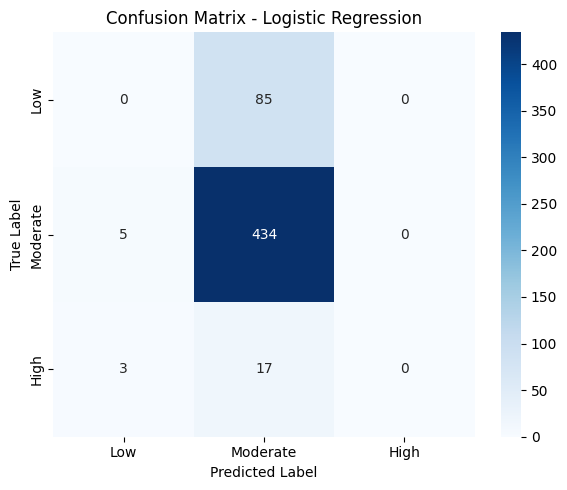

In [36]:

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Low", "Moderate", "High"],
            yticklabels=["Low", "Moderate", "High"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()
